In [1]:
options(warn=-1)

In [2]:
college <- read.csv("https://raw.githubusercontent.com/ropensci/datapack/main/inst/extdata/pkg-example/binary.csv") 
head(college)
nrow(college)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


[1] 400

In [3]:
install.packages("caTools") 
library(caTools) 
split <- sample.split(college, SplitRatio = 0.75) 
split

Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp6H8SaU\downloaded_packages


[1]  TRUE FALSE  TRUE  TRUE

In [5]:
training_reg <- subset(college, split == "TRUE") 
test_reg <- subset(college, split == "FALSE") 
fit_logistic_model <- glm(admit ~ .,data = training_reg,family = "binomial") 

In [6]:
coef(fit_logistic_model)["gre"] 
coef(fit_logistic_model)["gpa"] 
coef(fit_logistic_model)["rank"]  
predict_reg <- predict(fit_logistic_model,test_reg, type = "response")
predict_reg 

gre 
0.001821989

gpa 
0.9167915

rank 
-0.7820635

2          6         10         14         18         22         26 
0.27843319 0.35383259 0.53292582 0.34565111 0.07471076 0.44846987 0.70219888 
        30         34         38         42         46         50         54 
0.50210521 0.40260392 0.12861563 0.34596584 0.17970626 0.15195653 0.37743254 
        58         62         66         70         74         78         82 
0.10605734 0.09644306 0.41269244 0.71544256 0.49664973 0.40260392 0.31149531 
        86         90         94         98        102        106        110 
0.25772092 0.53304125 0.27005014 0.35667602 0.23331525 0.33935312 0.33184869 
       114        118        122        126        130        134        138 
0.52248598 0.48713680 0.19545716 0.09807325 0.07073589 0.14372718 0.35966325 
       142        146        150        154        158        162        166 
0.14197899 0.15677346 0.60529908 0.21576274 0.55018318 0.41035992 0.72855449 
       170        174        178        182        186        190        194 
0.24835485 0.46626763 0.19333022 0.13784533 0.50517976 0.31971651 0.08965859 
       198        202        206        210        214        218        222 
0.06840732 0.32151144 0.35105041 0.38419100 0.22191244 0.55477394 0.34922814 
       226        230        234        238        242        246        250 
0.26918096 0.42798873 0.09060123 0.45125526 0.61896382 0.38292809 0.28217890 
       254        258        262        266        270        274        278 
0.11274897 0.31681996 0.25965690 0.14617208 0.11586276 0.57224170 0.59474345 
       282        286        290        294        298        302        306 
0.13405627 0.10213955 0.03034631 0.75804595 0.25262590 0.26572489 0.11178904 
       310        314        318        322        326        330        334 
0.12071564 0.11839426 0.17474808 0.35044302 0.70248973 0.06272278 0.20513960 
       338        342        346        350        354        358        362 
0.08794979 0.11208951 0.13817732 0.26995873 0.44156266 0.59656061 0.55680839 
       366        370        374        378        382        386        390 
0.10947164 0.57116094 0.56561027 0.59566542 0.36497291 0.39620289 0.41258004 
       394        398 
0.45767166 0.18421543

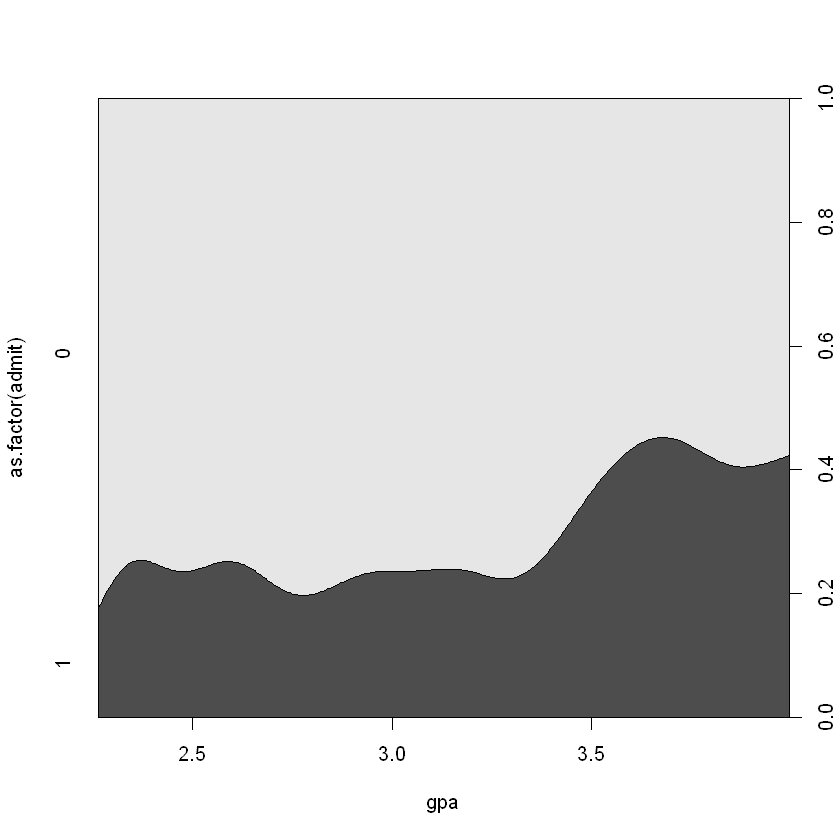

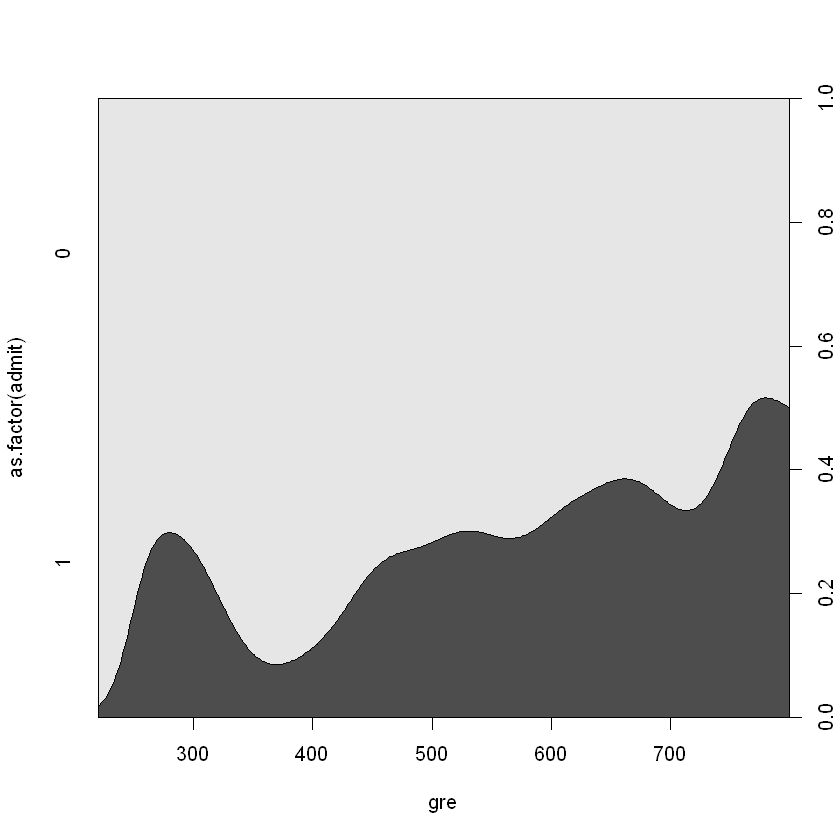

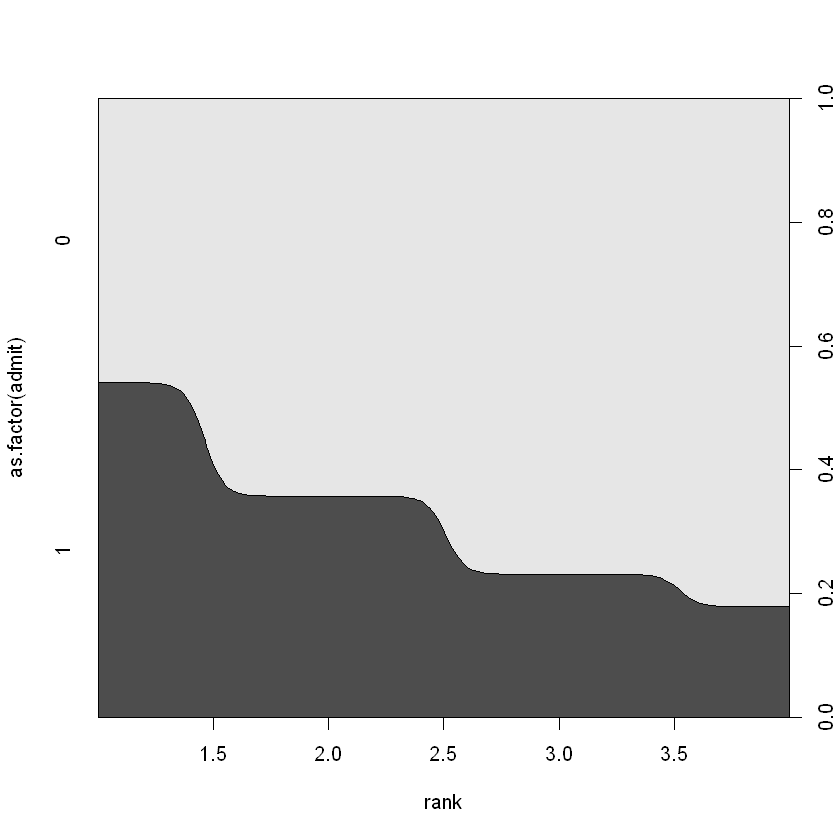

In [7]:
cdplot(as.factor(admit)~ gpa, data=college) 
cdplot(as.factor(admit)~ gre, data=college) 
cdplot(as.factor(admit)~ rank, data=college) 


In [8]:
predict_reg <- ifelse(predict_reg >0.5,1,0) 
predict_reg 
table(test_reg$admit, predict_reg)


2   6  10  14  18  22  26  30  34  38  42  46  50  54  58  62  66  70  74  78 
  0   0   1   0   0   0   1   1   0   0   0   0   0   0   0   0   0   1   0   0 
 82  86  90  94  98 102 106 110 114 118 122 126 130 134 138 142 146 150 154 158 
  0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   1 
162 166 170 174 178 182 186 190 194 198 202 206 210 214 218 222 226 230 234 238 
  0   1   0   0   0   0   1   0   0   0   0   0   0   0   1   0   0   0   0   0 
242 246 250 254 258 262 266 270 274 278 282 286 290 294 298 302 306 310 314 318 
  1   0   0   0   0   0   0   0   1   1   0   0   0   1   0   0   0   0   0   0 
322 326 330 334 338 342 346 350 354 358 362 366 370 374 378 382 386 390 394 398 
  0   1   0   0   0   0   0   0   0   1   1   0   1   1   1   0   0   0   0   0

   predict_reg
     0  1
  0 53 12
  1 26  9